# Plot of the timeseries

Now we have the data and we can customize the plot function

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
from aqua.logger import log_configure

def plot_paper_timeseries(monthly_data=None,
                          annual_data=None,
                          ref_monthly_data=None,
                          ref_annual_data=None,
                          std_monthly_data=None,
                          std_annual_data=None,
                          data_labels: list = None,
                          ref_label: str = None,
                          loglevel: str = 'WARNING',
                          **kwargs):
    """
    monthly_data and annual_data are list of xr.DataArray
    that are plot as timeseries together with their reference
    data and standard deviation.

    Arguments:
        monthly_data (list of xr.DataArray): monthly data to plot
        annual_data (list of xr.DataArray): annual data to plot
        ref_monthly_data (xr.DataArray): reference monthly data to plot
        ref_annual_data (xr.DataArray): reference annual data to plot
        std_monthly_data (xr.DataArray): standard deviation of the reference monthly data
        std_annual_data (xr.DataArray): standard deviation of the reference annual data
        data_labels (list of str): labels for the data
        ref_label (str): label for the reference data
        loglevel (str): logging level

    Keyword Arguments:
        figsize (tuple): size of the figure
        title (str): title of the plot

    Returns:
        fig, ax (tuple): tuple containing the figure and axis objects
    """
    logger = log_configure(loglevel, 'PlotTimeseries')
    fig_size = kwargs.get('figsize', (10, 5))
    fig, ax = plt.subplots(1, 1, figsize=fig_size)

    color_list = ["#1898e0", "#8bcd45", "#f89e13", "#d24493",
                  "#00b2ed", "#dbe622", "#fb4c27", "#8f57bf",
                  "#00bb62", "#f9c410", "#fb4865", "#645ccc"]

    if monthly_data is not None:
        if isinstance(monthly_data, xr.DataArray):
            monthly_data = [monthly_data]
        for i in range(len(monthly_data)):
            color = color_list[i]
            try:
                mon_data = monthly_data[i]
                label = data_labels[i]
                mon_data.plot(ax=ax, label=label, color=color, lw=2.0)
            except Exception as e:
                logger.debug(f"Error plotting monthly data: {e}")

    if annual_data is not None:
        for i in range(len(annual_data)):
            color = color_list[i]
            try:
                ann_data = annual_data[i]
                label = None
                ann_data.plot(ax=ax, label=label, color=color, linestyle='--', lw=2.0)
            except Exception as e:
                logger.debug(f"Error plotting annual data: {e}")

    if ref_monthly_data is not None:
        try:
            ref_label_mon = ref_label
            ref_monthly_data.plot(ax=ax, label=ref_label_mon, color='black', lw=1.0)
            if std_monthly_data is not None:
                std_monthly_data.compute()
                ax.fill_between(ref_monthly_data.time,
                                ref_monthly_data - 2.*std_monthly_data.sel(month=ref_monthly_data["time.month"]),
                                ref_monthly_data + 2.*std_monthly_data.sel(month=ref_monthly_data["time.month"]),
                                facecolor='grey', alpha=0.25)
        except Exception as e:
            logger.debug(f"Error plotting monthly std data: {e}")

    if ref_annual_data is not None:
        try:
            ref_label_ann = None
            ref_annual_data.plot(ax=ax, label=ref_label_ann, color='black', linestyle='--', lw=1.0)
            if std_annual_data is not None:
                std_annual_data.compute()
                ax.fill_between(ref_annual_data.time,
                                ref_annual_data - 2.*std_annual_data,
                                ref_annual_data + 2.*std_annual_data,
                                facecolor='black', alpha=0.2)
        except Exception as e:
            logger.debug(f"Error plotting annual std data: {e}")

    ax.legend(fontsize='x-large')
    ax.grid(axis="x", color="k")
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.set_xlabel("Year", fontsize=16)
    ax.set_ylabel(mon_data.long_name, fontsize=16)
    ax.tick_params(axis='both', which='major', labelsize=14)

    title = kwargs.get('title', None)
    if title:
        ax.set_title(title, fontsize=20)

    return fig, ax

We open the data produced by the diagnostic as xarray

In [2]:
data_mon = xr.open_dataarray('netcdf/timeseries.timeseries.climatedt-phase1.ICON.historical-1990.2t.frequency_monthly.nc')
data_ann = xr.open_dataarray('netcdf/timeseries.timeseries.climatedt-phase1.ICON.historical-1990.2t.frequency_annual.nc')
obs_mon = xr.open_dataarray('netcdf/timeseries.timeseries.obs.ERA5.era5.2t.frequency_monthly.nc')
obs_ann = xr.open_dataarray('netcdf/timeseries.timeseries.obs.ERA5.era5.2t.frequency_annual.nc')
std_mon = xr.open_dataarray('netcdf/timeseries.timeseries.obs.ERA5.era5.2t.frequency_monthly.stat_std.nc')
std_ann = xr.open_dataarray('netcdf/timeseries.timeseries.obs.ERA5.era5.2t.frequency_annual.stat_std.nc')

In [3]:
data_labels = ['ICON historical 1990']
ref_label = ['ERA5']

title = '2 meter temperature - ICON historical 1990, ERA5 1990-2020'

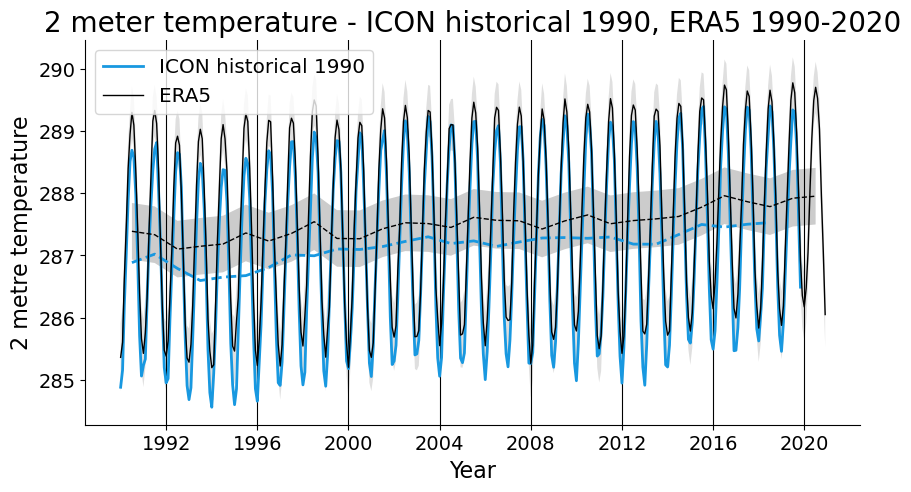

In [4]:
fig, ax = plot_paper_timeseries(monthly_data=[data_mon], annual_data=[data_ann],
                                ref_monthly_data=obs_mon, ref_annual_data=obs_ann,
                                std_monthly_data=std_mon, std_annual_data=std_ann,
                                data_labels=data_labels, ref_label=ref_label,
                                title=title, loglevel='DEBUG')

In [5]:
fig.savefig('timeseries.pdf', bbox_inches='tight')